In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
ide = pd.read_csv('electoral-democracy-index.csv')
ide = ide.loc[ide['Year'] == 2024].reset_index(drop=True)

In [3]:
controle_jus_gov = pd.read_csv('judicial-constraints-on-the-executive-index.csv')
controle_jus_gov = controle_jus_gov.loc[controle_jus_gov['Year'] == 2024].reset_index(drop=True)

In [4]:
jus_corrupcao = pd.read_csv('judicial-corruption-score.csv')
jus_corrupcao = jus_corrupcao.loc[jus_corrupcao['Year'] == 2024].reset_index(drop=True)

In [5]:
estado_direito = pd.read_csv('rule-of-law-index.csv')
estado_direito = estado_direito.loc[estado_direito['Year'] == 2024].reset_index(drop=True)

In [6]:
direitos_humanos = pd.read_csv('human-rights-index-vdem.csv')
direitos_humanos = direitos_humanos.loc[direitos_humanos['Year'] == 2024].reset_index(drop=True)

In [7]:
set(direitos_humanos['Entity']).difference(estado_direito['Entity'])

set()

In [8]:
set(estado_direito['Entity']).difference(direitos_humanos['Entity'])

set()

In [9]:
controle_jus_gov = controle_jus_gov.iloc[:, [0, 3]]

In [10]:
jus_corrupcao = jus_corrupcao.iloc[:, [0, 3]]

In [11]:
direitos_humanos = direitos_humanos.iloc[:, [0, 3]]

In [12]:
estado_direito = estado_direito.iloc[:, [0, 3]]

In [13]:
df_merged = jus_corrupcao.merge(controle_jus_gov, on="Entity").merge(direitos_humanos, on="Entity").merge(estado_direito, on='Entity')

In [14]:
df_merged

,Entity,Judicial corruption score (central estimate),Judicial constraints on the executive index (central estimate),Civil liberties index (central estimate),Rule of Law index (central estimate)
0,Afghanistan,-0.449000,0.104000,0.042000,0.095000
1,Africa,-0.578179,0.456679,0.581875,0.407589
2,Africa (population-weighted),-0.980639,0.454220,0.552009,0.364633
3,Albania,0.202000,0.653000,0.876000,0.574000
4,Algeria,-0.773000,0.128000,0.416000,0.249000
...,...,...,...,...,...
186,Vietnam,-1.168000,0.169000,0.410000,0.353000
187,Yemen,-1.897000,0.164000,0.231000,0.058000
188,Zambia,0.838000,0.728000,0.844000,0.674000
189,Zanzibar,0.433000,0.685000,0.664000,0.468000


In [15]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191 entries, 0 to 190
Data columns (total 5 columns):
 #   Column                                                          Non-Null Count  Dtype  
---  ------                                                          --------------  -----  
 0   Entity                                                          191 non-null    object 
 1   Judicial corruption score (central estimate)                    191 non-null    float64
 2   Judicial constraints on the executive index (central estimate)  191 non-null    float64
 3   Civil liberties index (central estimate)                        191 non-null    float64
 4   Rule of Law index (central estimate)                            191 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.6+ KB


In [16]:
new_df = pd.DataFrame({
    'C1': ide['Electoral democracy index (central estimate)'].corr(jus_corrupcao['Judicial corruption score (central estimate)'], method='spearman'),
    'C2': ide['Electoral democracy index (central estimate)'].corr(controle_jus_gov['Judicial constraints on the executive index (central estimate)'], method='spearman'),
    'C3': ide['Electoral democracy index (central estimate)'].corr(direitos_humanos['Civil liberties index (central estimate)'], method='spearman'),
    'C4': ide['Electoral democracy index (central estimate)'].corr(estado_direito['Rule of Law index (central estimate)'], method='spearman')
}, np.arange(1))

In [17]:
new_df

,C1,C2,C3,C4
0,0.645156,0.890183,0.947461,0.871557


In [18]:
new_df = new_df.melt(
    value_vars=['C1', 'C2', 'C3', 'C4'],
    var_name='Relacoes',
    value_name='Valores'
)

In [19]:
new_df

,Relacoes,Valores
0,C1,0.645156
1,C2,0.890183
2,C3,0.947461
3,C4,0.871557


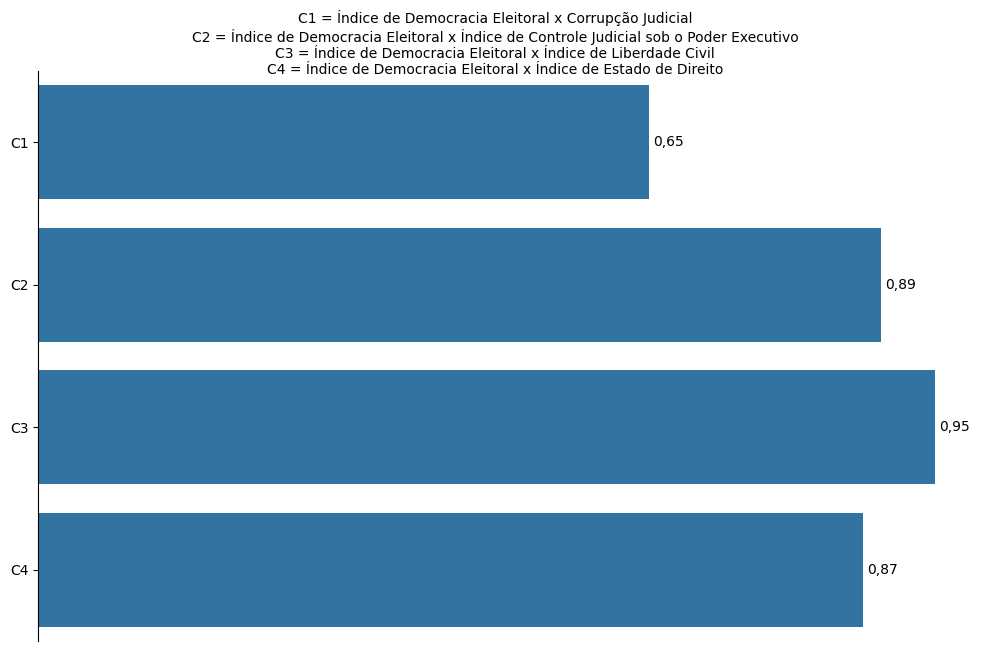

In [20]:
fig, ax = plt.subplots(figsize=(10, 6))

bar = sns.barplot(new_df, y='Relacoes', x='Valores')

ax.bar_label(bar.containers[0], fmt=lambda x: f'{x:.2f}'.replace('.', ','), label_type='edge', padding=3)

sns.despine(bottom=True)
ax.set_xlabel('')
ax.set_ylabel('')
ax.xaxis.set_visible(False)
plt.figtext(0.5, 0.97, "C1 = Índice de Democracia Eleitoral x Corrupção Judicial\nC2 = Índice de Democracia Eleitoral x Índice de Controle Judicial sob o Poder Executivo\nC3 = Índice de Democracia Eleitoral x Índice de Liberdade Civil\nC4 = Índice de Democracia Eleitoral x Índice de Estado de Direito", ha="center")
plt.tight_layout()
plt.savefig('C:/Users/lazar/Master-Dissertation/figuras/comparacao_democracia.png', dpi=300, bbox_inches='tight')
plt.show()